In [1]:
import numpy
import timeit
import numpy.matlib
from numba import jit
from matplotlib import pyplot as plt
%matplotlib inline

/home/nicolas/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
# CONSTANTS and INPUTS

q = 1 #Test charge
epsilon_m = 2 #Membrane Permittivity
epsilon_w = 80 #Solution Permittivity
c_pos = (0,0,0) #Charge position, (x,y,z) format
a_1 = -2 #Left boundary of the solute (X-axis)
a_2 = 2 #Right boundary of the solute (X-axis)
a = a_2 - a_1 #Solute thickness

e_pos = (1,0,0) #Evaluation point for the potential, (x,y,z) potential

### "Potential_calculation" trabaja con funciones de numpy, mientras que "Potential_calculation_2" usa un ciclo for. Ambas funciones hacen lo mismo, pero "Potential_calculation_2" se usó para comprobar que la primera funciona bien.

In [25]:
@jit
def potential_calculation(neg_infty, infty, epsilon_m, epsilon_w, c_pos, e_pos):
#     "neg_infty" and "infty" are the values used to represent the summation limits, "neg_infty" being the lower
#     limit and "infty" being the upper limit. These values define the size of the arrays that will be used later to evaluate
#     the potential in a point inside the epsilon_m medium. This is a 2D example, and in any case the Y and Z variables
#     are not important in any way, so only the first element of pos_i is varied.
    n = abs(neg_infty) + infty + 1
    Q_i = numpy.empty(n, dtype=object)
    x_i = numpy.empty(n, dtype=object)
    e_pos_array = numpy.matlib.repmat(e_pos,n,1)
    pos_i = numpy.matlib.repmat(c_pos,n,1)
    print(pos_i.shape)
    norma = numpy.empty(n, dtype = object)
    for i in range(neg_infty,infty+1):
        Q_i[i+abs(neg_infty)] = q*((epsilon_m - epsilon_w)/(epsilon_m + epsilon_w))**abs(i)
        pos_i[i+abs(neg_infty)][0] = ((-1)**i)*c_pos[0] + i*a
    phi = sum((1/(4*numpy.pi*epsilon_m))*numpy.divide(Q_i,numpy.linalg.norm((e_pos_array-pos_i), axis = 1)))
    return phi

In [18]:
# Método largo, SIN aplicar funciones integradas a numpy para los cálculos

@jit
def potential_calculation_2(neg_infty, infty, epsilon_m, epsilon_w):
#     "neg_infty" and "infty" are the values used to represent the summation limits, "neg_infty" being the lower
#     limit and "infty" being the upper limit. These values define the size of the arrays that will be used later to evaluate
#     the potential in a point inside the epsilon_m medium. This is a 2D example, and in any case the Y and Z variables
#     are not important in any way, so only the first element of pos_i is varied.
    n = abs(neg_infty) + infty + 1
    Q_i = numpy.empty(n, dtype=object)
    x_i = numpy.empty(n, dtype=object)
    e_pos_array = numpy.matlib.repmat(e_pos,n,1)
    pos_i = numpy.matlib.repmat(c_pos,n,1)
    phi = 0
    for i in range(neg_infty,infty+1):
        Q_i[i+abs(neg_infty)] = q*((epsilon_m - epsilon_w)/(epsilon_m + epsilon_w))**abs(i)
        pos_i[i+abs(neg_infty)][0] = ((-1)**i)*c_pos[0] + i*a
#         phi += Q_i[i+abs(neg_infty)]/(4*numpy.pi*epsilon_m*(numpy.linalg.norm(e_pos_array[i+abs(neg_infty)] - pos_i[i+abs(neg_infty)])))
        phi += Q_i[i+abs(neg_infty)]/(4*numpy.pi*epsilon_m*numpy.sqrt((e_pos_array[i+abs(neg_infty)][0] - pos_i[i+abs(neg_infty)][0])**2 + (e_pos_array[i+abs(neg_infty)][1] - pos_i[i+abs(neg_infty)][1])**2 + (e_pos_array[i+abs(neg_infty)][2] - pos_i[i+abs(neg_infty)][2])**2))
    return phi

In [26]:
muestras = numpy.arange(10, 121, 2)
eje_y = numpy.empty(len(muestras) - 1, dtype = object)
potentials = numpy.empty(len(muestras), dtype = object)

for j in range(len(muestras)):
    potentials[j] = potential_calculation(-muestras[j], muestras[j], epsilon_m, epsilon_w, c_pos, e_pos)
    
eje_y[:] = 100*abs(numpy.divide((potentials[1:] - potentials[:-1]), potentials[:-1]))

(21, 3)
(25, 3)
(29, 3)
(33, 3)
(37, 3)
(41, 3)
(45, 3)
(49, 3)
(53, 3)
(57, 3)
(61, 3)
(65, 3)
(69, 3)
(73, 3)
(77, 3)
(81, 3)
(85, 3)
(89, 3)
(93, 3)
(97, 3)
(101, 3)
(105, 3)
(109, 3)
(113, 3)
(117, 3)
(121, 3)
(125, 3)
(129, 3)
(133, 3)
(137, 3)
(141, 3)
(145, 3)
(149, 3)
(153, 3)
(157, 3)
(161, 3)
(165, 3)
(169, 3)
(173, 3)
(177, 3)
(181, 3)
(185, 3)
(189, 3)
(193, 3)
(197, 3)
(201, 3)
(205, 3)
(209, 3)
(213, 3)
(217, 3)
(221, 3)
(225, 3)
(229, 3)
(233, 3)
(237, 3)
(241, 3)


In [6]:
potentials[-1]

0.025342709617735593

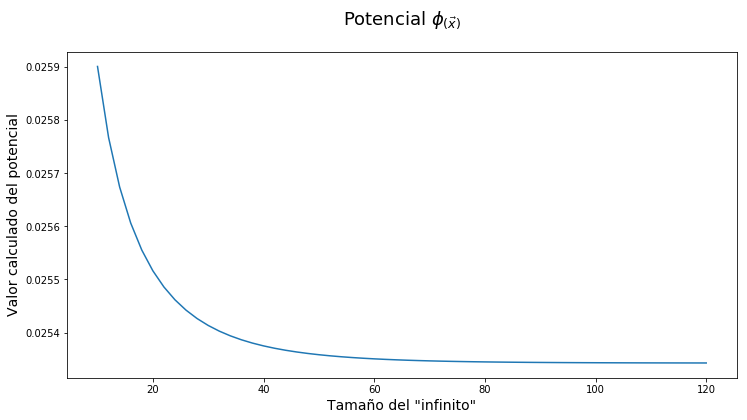

In [7]:
plt.figure(figsize = (12,6))
plt.plot(muestras, potentials)
plt.title('Potencial ' r'$\phi_{(\vec{x})}$' '\n', fontsize = 18)
plt.xlabel('Tamaño del "infinito"', fontsize = 14)
plt.ylabel('Valor calculado del potencial', fontsize = 14)
plt.show()

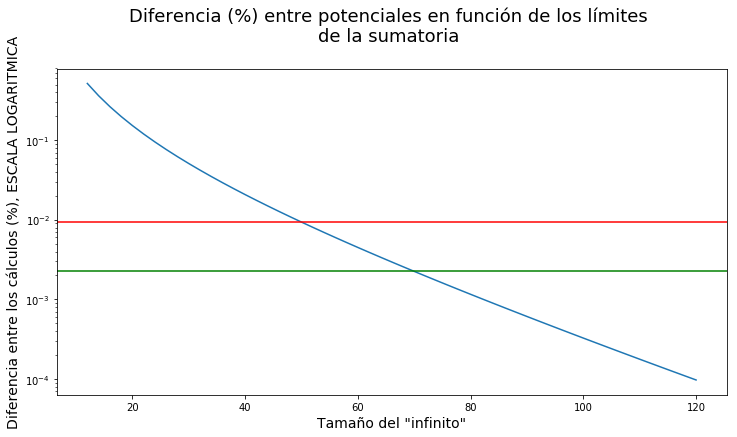

In [8]:
plt.figure(figsize = (12,6))
plt.semilogy(muestras[1:], eje_y)
plt.title('Diferencia (%) entre potenciales en función de los límites \n' 'de la sumatoria \n', fontsize = 18)
plt.xlabel('Tamaño del "infinito"', fontsize = 14)
plt.ylabel('Diferencia entre los cálculos (%), ESCALA LOGARITMICA', fontsize = 14)
plt.axhline((eje_y[19]), color = 'red')
plt.axhline((eje_y[29]), color = 'green')
plt.show()

### La línea roja marca la diferencia relativa entre el cálculo de potencial con los límites de la sumatoria igual a 50 y 48, mientras que la línea verde corresponde a la diferencia entre los potenciales con límites igual a 70 y 68.

Rojo: $\large\frac{\phi_{(\infty = 50)} - \phi_{(\infty = 48)}}{\phi_{(\infty = 48)}} \cdot 100\%$


Verde: $\large\frac{\phi_{(\infty = 70)} - \phi_{(\infty = 68)}}{\phi_{(\infty = 68)}} \cdot 100\%$

In [9]:
eje_y[29]

0.00225061685635101

In [10]:
dx = 1
lim_1 = -5
n_1 = int((0-a_1)/dx) + 1
n_2 = int(abs(lim_1)/dx) + 1
dummy_1 = numpy.arange(a_1, 0+dx, dx)
dummy_2 = numpy.arange(lim_1, 0+dx, dx)
test_charge_positions = numpy.empty(n_1, dtype = object)
evaluation_positions = numpy.empty((n_2,n_2), dtype = object)
# phi_1 = numpy.zeros(n_2, n_2)

In [11]:
# for k in range(n_1):
#     test_charge_positions[k] = (dummy_1[k], 0, 0)
#     for l in range(n_2):
#         for m in range(n_2):
#             evaluation_positions[l,m] = (dummy_1[k], dummy_2[l], dummy_2[m])

In [12]:
# evaluation_positions